In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [64]:
df = pd.read_csv("Boston.csv")

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [68]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


In [69]:
df['MEDV_log'] = np.log(df['MEDV'])

In [70]:
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

X = sm.add_constant(X)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [72]:
model= LinearRegression()

model.fit(X_train, y_train)

y_pred= model.predict(X_test)

In [73]:
mse= mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0368497358850177
Root Mean Squared Error: 0.19196285027321744
R-squared: 0.7862461665258489


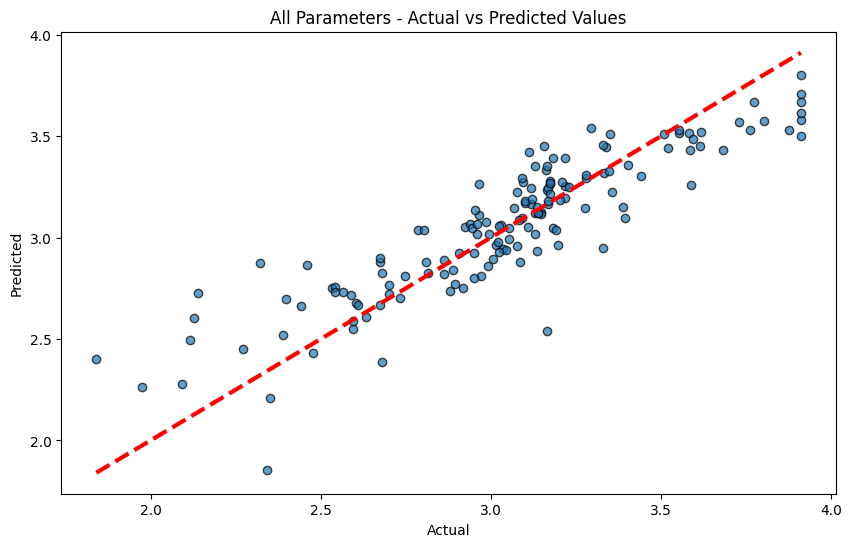

In [74]:
# Plotting actual vs predicted values for all parameters
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('All Parameters - Actual vs Predicted Values')
plt.show()

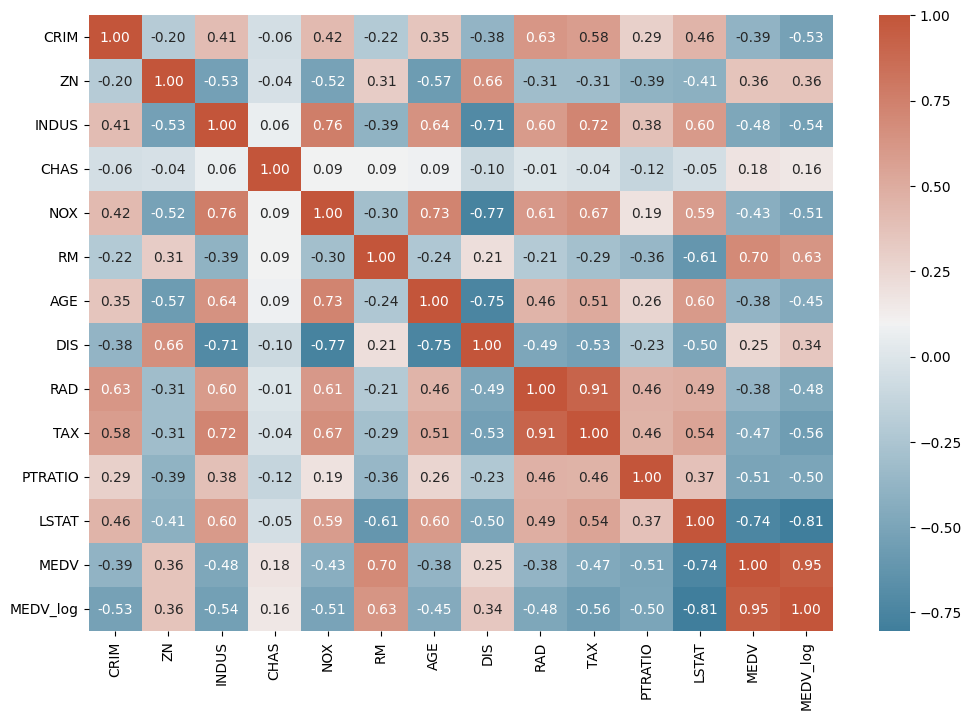

In [75]:
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)

plt.show()

In [76]:
relevant_features = ['CRIM', 'INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
# Linear regression with selected parameters
X_relevant = df[relevant_features]
y_relevant = df['MEDV_log']

In [77]:
# Split the data into training and testing sets
X_train_rel, X_test_rel, y_train_rel, y_test_rel = train_test_split(X_relevant, y_relevant, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model_rel = LinearRegression()

# Train the model
model_rel.fit(X_train_rel, y_train_rel)

LinearRegression()

In [78]:
y_pred_rel = model_rel.predict(X_test_rel)

In [79]:
# Evaluate the model
mse_rel = mean_squared_error(y_test_rel, y_pred_rel)
rmse_rel = np.sqrt(mse_rel)
r2_rel = r2_score(y_test_rel, y_pred_rel)

print(f"Selected Parameters - Mean Squared Error: {mse_rel}")
print(f"Selected Parameters - Root Mean Squared Error: {rmse_rel}")
print(f"Selected Parameters - R-squared: {r2_rel}")

Selected Parameters - Mean Squared Error: 0.04546458900885462
Selected Parameters - Root Mean Squared Error: 0.2132242692773377
Selected Parameters - R-squared: 0.7083431441325228


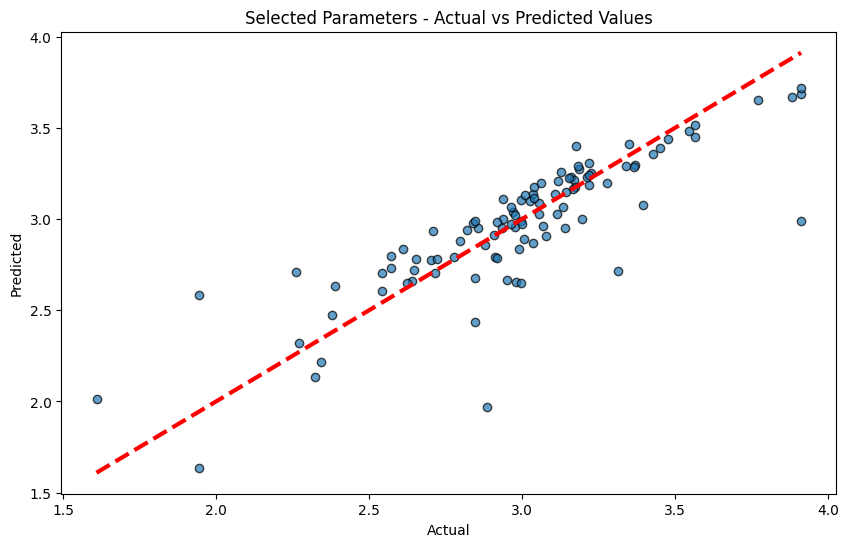

In [80]:
# Plotting actual vs predicted values for selected parameters
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rel, y_pred_rel, edgecolor='k', alpha=0.7)
plt.plot([y_test_rel.min(), y_test_rel.max()], [y_test_rel.min(), y_test_rel.max()], 'r--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Selected Parameters - Actual vs Predicted Values')
plt.show()